#Источник/сток в равномерном потоке  

In [14]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

Задаем параметры сетки

In [21]:
N = 200
x_start, x_end = -4.,4.
y_start, y_end = -2.,2
x = np.linspace(x_start,x_end,N)
y = np.linspace(y_start,y_end,N)
X,Y = np.meshgrid(x,y)

In [22]:
X

array([[-4.        , -3.95979899, -3.91959799, ...,  3.91959799,
         3.95979899,  4.        ],
       [-4.        , -3.95979899, -3.91959799, ...,  3.91959799,
         3.95979899,  4.        ],
       [-4.        , -3.95979899, -3.91959799, ...,  3.91959799,
         3.95979899,  4.        ],
       ..., 
       [-4.        , -3.95979899, -3.91959799, ...,  3.91959799,
         3.95979899,  4.        ],
       [-4.        , -3.95979899, -3.91959799, ...,  3.91959799,
         3.95979899,  4.        ],
       [-4.        , -3.95979899, -3.91959799, ...,  3.91959799,
         3.95979899,  4.        ]])

##Источник в равномерном потоке

Функция тока для равномерного потока со скоростью $U_\infty$ и  углом атаки $\alpha$ :

$$\psi_\text{freestream} \left(x,y\right) = U_\infty \left(y\cos\alpha - x\sin\alpha\right)$$

при $\alpha = 0$ : $\psi = U_\infty y,\quad u=U_\infty,\quad v=0$ 

In [23]:
u_inf = 1.

u_freestream = u_inf * np.ones((N,N),dtype=float)
v_freestream = np.zeros((N,N))

psi_freestream = u_inf * Y

Создадим функции `get_velocity()` и `get_stream function()`

In [24]:
def get_velocity(strength,xs,ys,X,Y):
    """Return the velocity field generated by a source/sink.
    
    Arguments
    ---------
    strength -- strength of the source/sink
    xs,ys    -- coordinates of the source/sink
    X,Y      -- mesh grid
    """
    u = strength/(2*np.pi)*(X-xs)/((X-xs)**2+(Y-ys)**2)
    v = strength/(2*np.pi)*(Y-ys)/((X-xs)**2+(Y-ys)**2)
    
    return u,v

def get_stream_function(strength,xs,ys,X,Y):
    """Return the stream function generated by a source/sink.
    
    Arguments
    ---------
    strength -- strength of the source/sink
    xs,ys    -- coordinates of the source/sink
    X,Y      -- mesh grid
    """
    psi = strength/(2*np.pi)*np.arctan2((Y-ys),(X-xs))
    
    return psi

In [25]:
strength = 5.0
x_source,y_source = -1.0, 0.0

u_source,v_source = get_velocity(strength,x_source,y_source,X,Y)
psi_source = get_stream_function(strength,x_source,y_source,X,Y)

Волшебство суперпозиции решений

<matplotlib.contour.QuadContourSet instance at 0x109150830>

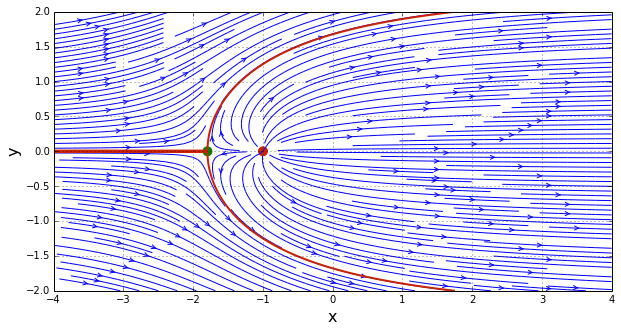

In [29]:
u = u_freestream + u_source
v = v_freestream + v_source
psi = psi_freestream + psi_source

size = 10
ar = (y_end-y_start)/(x_end-x_start)
plt.figure(figsize = (size,ar*size))
plt.grid(True)
plt.xlabel('x',fontsize = 16)
plt.ylabel('y',fontsize = 16)
plt.xlim(x_start,x_end)
plt.ylim(y_start,y_end)
plt.streamplot(X,Y,u,v,density = 2,linewidth=1,arrowsize=1,arrowstyle='->')
plt.scatter(x_source,y_source, color = '#CD2305',s=80,marker = 'o')

#stagnation point
x_stagnation = x_source - strength/(2*np.pi*u_inf)
y_stagnation = y_source
plt.scatter(x_stagnation,y_stagnation,color='g',s=80,marker='o')

#dividing line
plt.contour(X,Y,psi,
           levels = [-strength/2,strength/2],colors='#CD2305',
           linewidths = 2, linestyles = 'solid')

##Добавляем сток

In [30]:
strength_sink = -5.
x_sink, y_sink = 1.,0

u_sink,v_sink = get_velocity(strength_sink,x_sink,y_sink,X,Y)
psi_sink = get_stream_function(strength_sink,x_sink,y_sink,X,Y)

<matplotlib.contour.QuadContourSet instance at 0x10a9deb00>

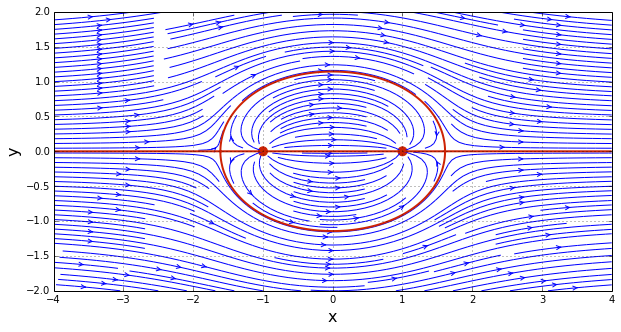

In [31]:
u = u_freestream + u_source + u_sink
v = v_freestream + v_source + v_sink
psi = psi_freestream + psi_source + psi_sink

size = 10
ar = (y_end-y_start)/(x_end-x_start)
plt.figure(figsize = (size,ar*size))
plt.grid(True)
plt.xlabel('x',fontsize = 16)
plt.ylabel('y',fontsize = 16)
plt.xlim(x_start,x_end)
plt.ylim(y_start,y_end)
plt.streamplot(X,Y,u,v,density = 2,linewidth=1,arrowsize=1,arrowstyle='->')
plt.scatter([x_source,x_sink],[y_source,y_sink], color = '#CD2305',s=80,marker = 'o')


#dividing line
plt.contour(X,Y,psi,
           levels = [0.],colors='#CD2305',
           linewidths = 2, linestyles = 'solid')

##Уравнение Бернулли и $C_p$

Уравнение Бернулли для несжимаемой жидкости:

$$p_\infty+\frac{1}{2}\rho V_\infty^2 = p + \frac{1}{2}\rho V^2$$

Коэффициент давления $C_p$ можно выразить как

$$C_p = 1- \left(\frac{V}{V_\infty}\right)^2$$

<matplotlib.contour.QuadContourSet instance at 0x10c3ce1b8>

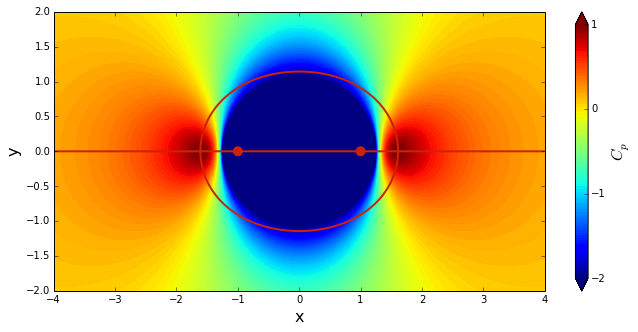

In [38]:
cp = 1. - (u**2+v**2)/u_inf**2

plt.figure(figsize=(1.1*size,ar*size))
plt.xlabel('x',fontsize = 16)
plt.ylabel('y',fontsize = 16)
plt.xlim(x_start,x_end)
plt.ylim(y_start,y_end)
contf = plt.contourf(X,Y,cp,levels = np.linspace(-2.,1.,100),
                     extend = 'both')
cbar=plt.colorbar(contf)
cbar.set_ticks([-2.,-1.,0,1.])
cbar.set_label('$C_p$',fontsize = 16)
plt.scatter([x_source,x_sink],[y_source,y_sink], color = '#CD2305',s=80,marker = 'o')


#dividing line
plt.contour(X,Y,psi,
           levels = [0.],colors='#CD2305',
           linewidths = 2, linestyles = 'solid')